# Greener Cities, Safer Streets? Exploring the Impact of Green Spaces on Crime
### Research by Clara Bottinelli, Amélie Madrona, Linne Verhoeven, You Li

<center>
  <a name="overview"> </a> <img src="https://raw.githubusercontent.com/Amelie-Mad/green_spaces/refs/heads/main/illustrations/illustrationstep7.jpg" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>

"One unexpected way to reduce violent crime? Create green spaces” This bold National Geographic headline suggests an intriguing strategy for urban safety (Burtka, 2023). But does this claim hold true universally?

## 1. Planting the seeds: context and motivation
<center>
  <a name="step-1"> </a> <img src="https://github.com/Amelie-Mad/green_spaces/blob/main/illustrations/illustrationstep1.jpg?raw=true" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>


Several studies have shown that in US urban neighbourhoods, green space is linked to lower crime rates (Schertz et al., 2021; Kuo & Sullivan, 2001; Jennings et al., 2024). The mechanisms at hand?

1. Exposure to green space in cities increases mental health, reduces stress, improves well-being and contributes to increased happiness levels, which all together help reduce crime (Weinstein et al., 2015).
2. At a community level, green space promotes social cohesion through the creation of a sense of belonging and support,  contributing to a further decrease in crime (Kuo & Sullivan, 2001; Jennings et al., 2024).
3. The presence of green space in neighbourhoods increases “eyes on the street”, meaning that green space can increase the number of people outdoors, which naturally increases surveillance and again discourages crime (Schertz et al., 2021, Kuo & Sullivan, 2001).
4. Green space encourages outdoor activities and social interaction, creating an environment where illegal activities are more noticeable and less likely to occur, as studied in Chicago and New York City (Schertz et al., 2021; Kuo & Sullivan, 2001).

This concise literature plants two important seeds for thought. First, the presence of green spaces appears to help reduce crime in cities. Second, most research on this topic focuses on the U.S., and examines individual cities or neighbourhoods to explore the effect. To address this gap, we aim to answer the following research question: “Can the presence of green space help reduce crime across European cities?”

Let’s explore together whether verdant spaces truly hold the power to transform urban safety.

## 2. Nurturing the soil: gathering the data

<center>
  <a name="step-2"> </a> <img src="https://github.com/Amelie-Mad/green_spaces/blob/main/illustrations/illustrationstep2.jpg?raw=true" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>


**Let’s make sure our research ground is ready for analysis by gathering the right data.**

We measure green space by the percent of tree coverage of cities. We measure crime using homicide records on a regional level across Europe.

Before planting our seeds to grow insights on the relationship between green spaces and crime rate, we must consider other key factors that require our attention:

- **Education**: Higher education levels are linked to increased social cohesion and reduced crime rates (Machin et al., 2011, Jennings et al., 2024). Moreover, green spaces tend to be more present and accessible in more educated neighbourhoods (Jennings et al., 2024).  

- **Income level**: Poverty is strongly associated with higher crime rates (Patterson, 1991). Low-income neighbourhoods have fewer and poorly maintained green space facilities compared to high-income neighborhoods (Jennings et al., 2024, Venter et al., 2020). We use GDP per capita on the regional level as a proxy.

- **Population Density**: High-density urban areas often experience reduced social cohesion. This impacts interactions between individuals, which affects green space usage (Jennings et al., 2024).

- **Temperature**: Elevated temperatures are directly linked to increases in crime, due to increased aggressive behaviour (Wu et al., 2019). Moreover, strong increases in temperature in urban areas may restrict tree growth (Monteiro et al., 2017).

- **Precipitation**: Precipitation level is strongly correlated with tree growth in urban settings (David et al., 2017), and it seems to not be directly related to homicide rate variations (Wu et al., 2019). This suggests that it has potential as an IV.

- **Satisfaction with green spaces**: This variable may influence how people make use of green space (Schertz et al., 2021) and therefore strengthen the relationship between green space and crime, acting as a mediator variable.


All the variables and the associated linkages are visualized below:

<center>
  <a name="figure-1"> </a> <img src=" https://github.com/Amelie-Mad/green_spaces/blob/main/illustrations/DAG.jpg?raw=true" width="700">
  <p style="font-style: italic; color: #555;">
    Figure 1: Directed Acyclic Graph
  </p>
</center>

**We're almost ready to plant! One last step: bringing the data together**

The data about crime is reported by Nomenclature des Unités Territoriales Statistiques 3 **(NUTS3)**, which corresponds to regions. The data for all confounders is also available on this regional level, therefore we merge the data based on these regions (see [Appendix 1](#appendix-1-data-sources-and-description)).

The data about green space is reported by Functional Urban Area **(FUA)**, which is described by the OECD as a city together with its commuting zones(Djikstra et al., 2019). We will refer to these as cities.

The difficulty is that these regions and cities do not allow a one-to-one mapping. In our dataset, cities are either a subset of a region or partially covered by multiple regions. Note that each region is only associated with a single city. We use a matching table by ESPON to connect cities with regions. Then, we estimate city values for crime and for other confounders based on those of regions intersecting with the city. Essentially, this means that we are using regional values or an average thereof as a proxy for the city. This is a clear limitation of our study as it might introduce measurement errors, which we discuss later.

The resulting data frame has **227 observations spanning 9 countries in the year of 2018**. No data transformation was needed as it was not skewed in the final sample. The latter is now ready to be imported along with further gardening tools: python packages.

In [39]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from tabulate import tabulate

In [40]:
# Reading our cleaned dataframe, which includes data about crime, green space, our controls, IV and heterogeneous variables
url = 'https://raw.githubusercontent.com/Amelie-Mad/green_spaces/refs/heads/main/Cleaned_dataframes/full_sample.csv'
sample = pd.read_csv(url)

**While our data surely is a magnificent seed, it might hide some biases in its origins.**

#### Sample bias:

The representativeness of our sample might pose a limitation. With only 9 countries included and a large imbalance toward Germany, as shown in Figure 2, this suggests a geographic bias and might limit our ability to generalise results across and beyond our sample.

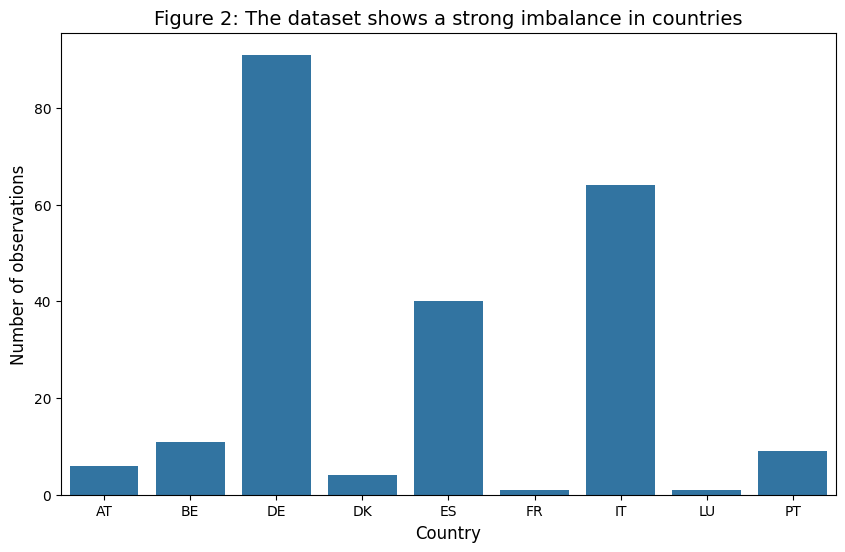

In [41]:
# Plotting the geographical representation in our data
plt.figure(figsize=(10, 6))
sns.countplot(sample, x="country")
plt.title('Figure 2: The dataset shows a strong imbalance in countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of observations', fontsize=12)
plt.show()




#### Measurement bias:
In general, crime rates suffer from measurement errors, as criminal activity tends to be under-reported or misclassified (Pina-Sanchez et al., 2023). This might not be homogeneously the case across countries or even regions, obscuring the relationship between green space and crime that we can observe.  

Our choice of proxies might also have introduced some measurement bias: we use tree cover in cities as a proxy for the presence of public parks. The two may largely overlap, but tree cover may also include trees outside of parks (e.g. on private properties or along streets). Similarly, we use GDP per capita as a measure for income level, although it might not capture the same information. This might introduce biases in our analyses.

## 3. Sprouting roots: Establishing the baseline model

<center>
  <a name="step-3"> </a> <img src="https://github.com/Amelie-Mad/green_spaces/blob/main/illustrations/illustrationstep3.jpg?raw=true" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>


**We specify our baseline regression as an Ordinary Least Squares (OLS) model.**

### Baseline model

$$
Homicide\_rate_{i} = \beta_0 + \beta_1 \cdot Green\_space_{i} + \gamma_1 \cdot Temperature_{i} + \gamma_2 \cdot Population\_density_{i} \\ + \gamma_3 \cdot Education_{i} + \gamma_4 \cdot GDP\_per\_capita_{i} + FE_i + \epsilon_{i}
$$

for $i = 1, ..., N$, where $FE_i$ is country fixed effects and $\beta_0$ the intercept.   

This baseline model accounts for both key controls, as suggested by the literature review, and fixed effects (FE). We introduce FE to refine our understanding and enhance the robustness of our results. In essence, FE help control for unobserved confounders that vary from one country to another, like geography, methods of crime reporting, quality of the police force or cultural norms relating to crime or green space. All these factors might have a significant influence on our dependent variable, homicide rate, and inflict potential biases. By introducing country FE, we account for these potential biases and make our regression more robust.

Based on the literature review, we expect our baseline regression to reveal a **negative correlation** between green space and crime rates.

Note 1: We relax assumptions on errors by using clustered errors at the country level. This allows error terms to covariate based on the country the observations belong to, mitigating concerns of heteroscedasticity.

Note 2: Because we don’t have many confounders, causal AI was not considered a useful tool for this project.

### Running the regression


In [42]:
# Create dummy variables for the 'country' column
sample_with_dummies = pd.get_dummies(sample, columns=['country'], drop_first=True)

sample_with_dummies['country'] = sample['country']
# Convert boolean dummies to integers
dummy_columns = [col for col in sample_with_dummies.columns if col.startswith('country_')]
sample_with_dummies[dummy_columns] = sample_with_dummies[dummy_columns].astype(int)
controls = ['mean_temp','mean_pop_density','mean_edu', 'gdp_pp']

# Specifying the model
Y_hrate = sample_with_dummies['h_rate']

X_mlr_fe = sample_with_dummies[['green'] + controls + dummy_columns]
X_mlr_fe = sm.add_constant(X_mlr_fe)

# Fitting the model
model_mlr_fe = sm.OLS(Y_hrate, X_mlr_fe).fit(cov_type='cluster', cov_kwds={'groups': sample_with_dummies['country']})

#TODO: Tableau

print('Table 1: Results of baseline regression')
print(tabulate([['Green space', model_mlr_fe.params['green'], model_mlr_fe.pvalues['green']]], headers=['Variable','Coefficient','P-value'], tablefmt='orgtbl',floatfmt=".4f"))


Table 1: Results of baseline regression
| Variable    |   Coefficient |   P-value |
|-------------+---------------+-----------|
| Green space |       -0.0005 |    0.8568 |


Our baseline regression shows virtually no effect of green space on crime as the coefficient of green space is close to 0 (-0.0005) and the associated p-value is 0.8568, which implies no statiscal significance.

<center>
  <a name="figure-3"> </a> <img src=" https://github.com/Amelie-Mad/green_spaces/blob/main/illustrations/FE_illustration.jpg?raw=true " width="700">
  <p style="font-style: italic; color: #555;">
    Figure 3: Directed Acyclic Graph with unobserved subcountry variables
  </p>
</center>

Why are the findings from our baseline regression different from what we expected? It could be because of endogeneity issues. We identify 2 possible remaining problems, as shown in Figure 3:
-	**Omitted Variables:** Unobserved phenomena at the sub-country level influence our effect. Some omitted variables like a good park layout (Jennings et al., 2024), or a progressive government could decrease crime, meaning that not including these variables overestimates the effect green space has on crime.

-	**Reverse causality:** Instead of green space impacting crime, it could be the opposite: crime impacts green space. For instance, low crime rates may increase investment decisions in green spaces, and vice versa. This would suggest that low crimes are already associated with higher green spaces, hinting that the effect we observe is overestimated.



## 4. Weeding out endogeneity: including the IV

<center>
  <a name="step-3"> </a> <img src="https://raw.githubusercontent.com/Amelie-Mad/green_spaces/refs/heads/main/illustrations/illustrationstep4.jpg" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>


**To address these endogeneity issues, we use the two-stage least squares (2SLS) approach.**
The 2SLS method uses an instrumental variable (IV) to isolate exogenous variation in green space.
This would allow us to:
-	Control for unobserved sub-country effects that may bias the relationship
-	Mitigate reverse causality by leveraging the variation in green space that is unrelated to crime

We have good reasons to believe that precipitation serves as a good IV. First, it is relevant as precipitation levels are strongly correlated with tree growth in urban settings (David et al., 2017). Second, research shows that precipitation influences the location of crime (indoor versus outdoor), not its occurrence, hence not causing a direct impact on crime rates (Wu et al., 2019; Mares, 2013).

One must not venture into the intricate foliage of IV without a clear sight. An IV must satisfy two conditions: **relevance and validity**.  Before conducting 2SLS, an IV can be tested as follows:

### Is the IV correlated with the endogenous variable $X$
The IV must be a strong predictor of the endogenous variable (green space) in order to generate meaningful variation to estimate the causal relationship.

-  **Test 1, Relevance test**: We regress green space on all the controls and the IV. We expect precipitation to be statistically significant when predicting green space.

### Does the IV seem to be uncorrelated with all other unobserved determinants of $Y_i$ ($\epsilon_i$)
The IV must satisfy the **exclusion restriction**: it should influence the dependent variable (crime) only through the endogenous variable (green space), and not through any direct or other pathways. If the IV has a direct effect on the dependent variable, it biases the estimation and invalidates the results.

Note: the exclusion condition cannot be tested directly with a statistical test. However, we can perform 2 tests to strengthen the validity of this hypothesis.

- **Test 2, Reduced form test**: The reduced form test helps evaluate whether the IV has any apparent relationship with the dependent (crime) variable. We regress crime rate on the IV and all the controls. Passing the test requires precipitation to be statistically significant when predicting crime. We expect that precipitation affects crime through green space, hence we foresee this test to be validated.

- **Test 3, Conditional independence test**: This test helps to evaluate whether the instrument influences the dependent variable only through the endogenous regressor. We regress crime rate on the IV, green space and all other controls. For the IV to be valid, it needs to become statistically insignificant at this stage. We expect this test to be successful as we assume precipitation has no direct effect on crime.

Violating any of these conditions in 2SLS breaks the model’s assumptions, leading to **biased estimates and invalid conclusions about causality**.
Introducing the instrumental variable, we expect to see the effect of green space on crime to become even weaker, given the anticipated overestimations of the biases introduced by the omitted variables & reverse causality.

The tests are specified as follows:

Test 1: Does precipitation impact green space?
$$
Green\_space_i = \beta_0 + \beta_1 \cdot Precipitation_i + \gamma_1 \cdot Temperature_i + \gamma_2 \cdot Population\_density_i \\ + \gamma_3 \cdot Education_i + \gamma_4 \cdot GDP\_per\_capita_{i} + FE_i + \epsilon_i
$$

Test 2: Does precipitation impact crime?

$$
Homicide\_rate_i = \beta_0 + \beta_1 \cdot Precipitation_i + \gamma_1 \cdot Temperature_i + \gamma_2 \cdot Population\_density_i \\ + \gamma_3 \cdot Education_i + \gamma_4 \cdot GDP\_per\_capita_{i} + FE_i + \epsilon_i
$$

Test 3: Is it plausible that precipitation only impact through green space?

$$
Homicide\_rate_i = \beta_0 + \beta_1 \cdot Green\_space_1 + \beta_2 \cdot Precipitation_i + \gamma_1 \cdot Temperature_i \\ + \gamma_2 \cdot Population\_density_i + \gamma_3 \cdot Education_i + \gamma_4 \cdot GDP\_per\_capita_{i} + FE_i + \epsilon_i
$$

In [43]:
# We run the regressions to test the IV as specified above
# Relevance test
Y_green = sample_with_dummies['green']
X_precip = sample_with_dummies[['mean_pre'] + controls + dummy_columns]
X_precip = sm.add_constant(X_precip)
test1 = sm.OLS(Y_green, X_precip).fit(cov_type='cluster', cov_kwds={'groups': sample_with_dummies['country']})
# Reduced form test
Y_hrate = sample_with_dummies['h_rate']
X_precip = sample_with_dummies[['mean_pre'] + controls + dummy_columns]
X_precip = sm.add_constant(X_precip)
test2 = sm.OLS(Y_hrate, X_precip).fit(cov_type='cluster', cov_kwds={'groups': sample_with_dummies['country']})
# Conditional independence test
Y_hrate = sample_with_dummies['h_rate']
X_precip = sample_with_dummies[['green','mean_pre'] + controls + dummy_columns]
X_precip = sm.add_constant(X_precip)
test3 = sm.OLS(Y_hrate, X_precip).fit(cov_type='cluster', cov_kwds={'groups': sample_with_dummies['country']})

Let’s now have a look at our results running the different tests.

In [44]:
# Visualise results from the regressions specified above to test our IV
tests = [test1,test2, test3]
tests_name = ['Relevance','Reduced form', 'Conditional independence']
varname = 'mean_pre'
table = []


for test, test_name in zip(tests, tests_name):
      coef = test.params[varname]  # Coefficient for 'mean pre'
      pvalues = test.pvalues[varname]
      table += [[test_name, coef, pvalues]]
print('Table 2: results of IV tests')
print(tabulate(table, headers=['Test','Coefficient','P-values'], tablefmt='orgtbl',floatfmt=".4f"))


Table 2: results of IV tests
| Test                     |   Coefficient |   P-values |
|--------------------------+---------------+------------|
| Relevance                |       12.3865 |     0.0000 |
| Reduced form             |       -0.0722 |     0.1789 |
| Conditional independence |       -0.0769 |     0.0490 |


We interpret table 2:

**Test 1**: Validated, $\beta_1$ is 12.3865 and the p-value is close to 0, indicating that precipitation is a strong predictor for green space.

**Test 2**: Failed: a p-value of 0.1789 indicates that precipitation doesn’t impact crime statistically significantly. This implies that our IV has a weak or negligible association with the dependent variable (crime), rendering it invalid. Therefore, we do not proceed further with the IV but we provide the code in [Appendix 3](#appendix-3-2sls-code), while we discuss other avenues in the [discussion section](#6-weathering-the-storm-discussions).

## 5. Growing separate branches: heterogeneity

<center>
  <a name="step-5"> </a> <img src=" https://raw.githubusercontent.com/Amelie-Mad/green_spaces/refs/heads/main/illustrations/illustrationstep5.jpg" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>

**Given our unsuccessful attempt at the IV, it is now time to explore a new branch of causality: Heterogeneity.**

Analysing heterogeneous effects helps us explore how the impact of green space on crime varies across different groups or conditions. Addressing these effects is essential as they could have been obscuring the relationship between green space and crime until now.  

Under heterogeneous effect, the question becomes: could the effect of green space on crime change when satisfaction about green spaces, our heterogenous variable, is high compared to when it is low?  

We believe satisfaction about green space might influence how people engage with green spaces (Jennings et al., 2024), acting as a mediating mechanism that determines whether green space reduces or increases crime. We hypothesise that high satisfaction could be associated with more use of the space, which improves mental health, increases community cohesion and the "eyes on the street" effect thereby reducing crime (Schertz et al., 2021). As such, we expect that cities with high satisfaction about their green spaces display a stronger negative relationship between green space and crime. It could even be that the relationship is reversed for cities with low satisfaction.

Satisfaction, our heterogeneous variable, is unavailable for 2018. To assess if available 2019 values can proxy for 2018, we calculate the year-to-year correlation of satisfaction scores, yielding a high coefficient of 0.97 (see [Appendix 4](#appendix-4-correlation-of-green-space-satisfaction-from-one-year-to-the-next)). This indicates stability over time, making the use of 2019 scores reasonable, though minor measurement errors may be introduced.

The final dataset includes **45 observations across 8 countries**.

To isolate the effects of sample reduction and the introduction of the heterogeneous variable, we proceed in two steps: we run the baseline model on the reduced sample. Then we introduce an interaction term to assess whether the effect of green space on crime is strengthened by satisfaction.

### Sample reduction


In [45]:
# We drop all the observations for which we do not have satisfaction
restricted_sample = sample.dropna(subset=['2019_satisfaction']).reset_index(drop=True)

# We add dummy variables for the countries, removing the first one to not fall into the dummy variable trap
restricted_sample_dummies = pd.get_dummies(restricted_sample, columns=['country'], drop_first=True)
restricted_sample_dummies['country'] = restricted_sample['country']
dummy_columns_r = [col for col in restricted_sample_dummies.columns if col.startswith('country_')]
restricted_sample_dummies[dummy_columns_r] = restricted_sample_dummies[dummy_columns_r].astype(int)

In [46]:
# We run the baseline regression, with FE but with no interaction term to show effect of sample size reduction
Y_r_fe = restricted_sample_dummies['h_rate']
X_r_fe = restricted_sample_dummies[['green'] + controls + dummy_columns_r]
X_r_fe = sm.add_constant(X_r_fe)

model_hetero_fe = sm.OLS(Y_r_fe, X_r_fe).fit(cov_type='cluster', cov_kwds={'groups': restricted_sample_dummies['country']})

In [47]:
# Please bear with us while we create a couple of functions to visualise results nicely and consistently later on
def extract_coefs(varname, models):
    """
    Extract variable coefficients and their standard error from OLS table

    Args:
    - model_names: List of model names (x-axis labels).
    - varnames: List of variable names to extract coefficients for.
     """

    coefs = []
    ci_lower = []
    ci_upper = []
    for model in models:
        coef = model.params[varname]  # Coefficient for variable of interest
        std_err = model.bse[varname] # Standard error for variable of interest

        # Calculate 95% confidence intervals
        ci_low = coef - 1.96 * std_err
        ci_up = coef + 1.96 * std_err

        # Append results
        coefs.append(coef)
        ci_lower.append(ci_low)
        ci_upper.append(ci_up)
    return coefs, ci_lower, ci_upper

def plot_regression_coefficients(models, model_names, varnames=['green'], title='Title'):
    """
    Plot coefficients and confidence intervals for multiple variables side by side.

    Args:
    - models: List of regression models.
    - model_names: List of model names (x-axis labels).
    - varnames: List of variable names to extract coefficients for.
    - title: Title of the plot.
    """
    # Initialize storage for coefficients and intervals for all variables
    all_coefs = {varname: [] for varname in varnames}
    all_ci_lower = {varname: [] for varname in varnames}
    all_ci_upper = {varname: [] for varname in varnames}

    # Extract coefficients and confidence intervals for each variable
    for varname in varnames:
        coefs, lowers, uppers = extract_coefs(varname, models)
        all_coefs[varname] = coefs
        all_ci_lower[varname] = lowers
        all_ci_upper[varname] = uppers

    # Plotting
    plt.figure(figsize=(8, 6))
    x_positions = np.arange(len(model_names))  # X positions for the models

    # Plot each variable's coefficients with error bars
    for i, varname in enumerate(varnames):
        offset = (i - len(varnames) / 2) * 0.2  # Offset to separate variables
        yerr = [
            np.array(all_coefs[varname]) - np.array(all_ci_lower[varname]),
            np.array(all_ci_upper[varname]) - np.array(all_coefs[varname])
        ]
        plt.errorbar(
            x_positions + offset,
            all_coefs[varname],
            yerr=yerr,
            fmt='o',
            capsize=5,
            label=f'{varname.capitalize()} (95% Confidence)'
        )

    # Add horizontal line, labels, and legend
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.title(title)
    plt.ylabel('Coefficient')
    plt.xlabel('Models')
    plt.xticks(ticks=x_positions, labels=model_names)
    plt.legend()
    plt.tight_layout()
    plt.show()


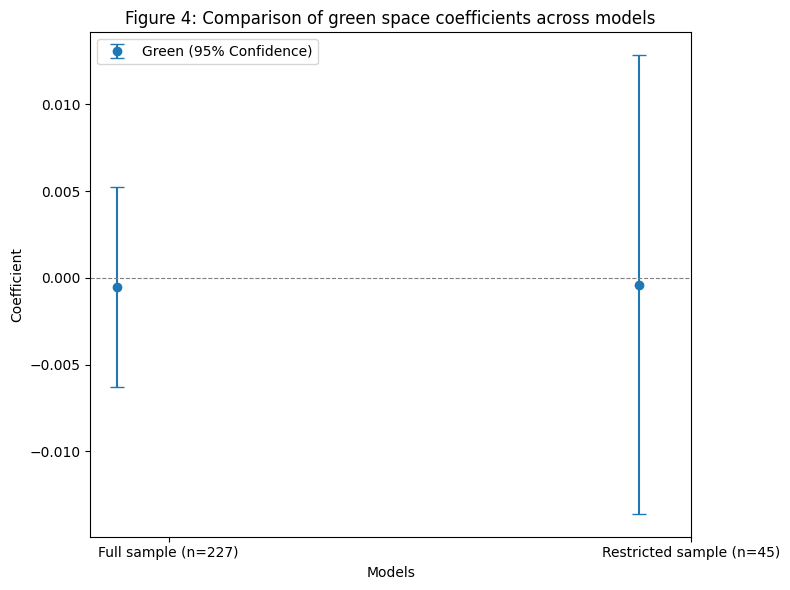

In [48]:
# Visualising the results of the previous regressions
plot_regression_coefficients([model_mlr_fe,model_hetero_fe], ['Full sample (n=227)','Restricted sample (n=45)'], varnames = ['green'], title = 'Figure 4: Comparison of green space coefficients across models')

As shown in Figure 4, we observe, by comparing the two coefficients, that the reduction in sample does not affect the green space coefficient: it moves from -0.0005 to -0.0004. The p-value of the coefficient remains non-significant (p-value of 0.955). This aligns with expectations, given that we did not tackle the heterogeneous treatment effect at this stage while reducing the sample size, which increases standard error.  

### Introducing the heterogeneous variable

We now move on to the heterogeneous treatment effect by introducing a dummy variable indicating high and low levels of satisfaction with respect to the median. Then, we run the baseline model while adding an interaction term between green space and the dummy variable. The interaction term tells us about how differently green space effects crime when satisfaction is high compared to when it is low. A discussion about different categorisations into high and low groups that are more natural given the distribution of our heterogeneous variable can be found in [Appendix 4](#appendix-4-correlation-of-green-space-satisfaction-from-one-year-to-the-next), although (spoiler) these do not result in statistically significant results either.

The model is specified as follows:
$$
Homicide\_rate_i = \beta_0 + \beta_1 \cdot Green\_space_i + \beta_2 \cdot Satisfaction_i + \beta_3 \cdot (Green\_space_i \cdot Satisfaction_i) \\ + \gamma_1 \cdot Temperature_i + \gamma_2 \cdot Population\_density_i + \gamma_3 \cdot Education_i + \gamma_4 \cdot GDP_i + FE_i + \epsilon_i
$$

where
- $Satisfaction_i$: dummy variable (1 represents high satisfaction while 0 represents low satisfaction)
- $Green\_space_i \cdot Satisfaction_i$: interaction term

In [49]:
# Restricted sample with FE and interaction
restricted_sample_dummies['satisfaction_dummy'] = (restricted_sample_dummies['2019_satisfaction'] >= restricted_sample_dummies['2019_satisfaction'].median()).astype(int)

restricted_sample_dummies['interaction'] = restricted_sample_dummies['green'] * restricted_sample_dummies['satisfaction_dummy']

Y_r_fe_i = restricted_sample_dummies['h_rate']
X_r_fe_i = restricted_sample_dummies[['green', 'satisfaction_dummy', 'interaction'] + controls + dummy_columns_r]
X_r_fe_i = sm.add_constant(X_r_fe_i)

model_hetero_fe_int = sm.OLS(Y_r_fe_i, X_r_fe_i).fit(cov_type='cluster', cov_kwds={'groups': restricted_sample_dummies['country']})


In [50]:
# Visualising results
varnames = ['green','interaction']

table = []
coef = []
pvalues = []

for varname in varnames:
      coef = model_hetero_fe_int.params[varname]  # Coefficient for 'mean pre'
      pvalues = model_hetero_fe_int.pvalues[varname]
      table += [[varname, coef, pvalues]]

print('Table 3: Results of Interaction term regression')
print(tabulate(table, headers=['Variable','Coefficient','P-value'], tablefmt='orgtbl',floatfmt=".4f"))

Table 3: Results of Interaction term regression
| Variable    |   Coefficient |   P-value |
|-------------+---------------+-----------|
| green       |        0.0058 |    0.5404 |
| interaction |       -0.0136 |    0.3338 |


As shown in Table 3, the coefficient $\beta_1$ for green is 0.0058 and suggests that green space increases crime in cities where satisfaction is low. The coefficient $\beta_3$ for the interaction term has a value of -0.0136, suggesting that the negative effect of green space on crime is 0.0136 stronger in cities with above-median satisfaction about their green space. This hints that the impact of green space on crime reverses to a negative relationship when satisfaction is high ($\beta_{high} = \beta_1 + \beta_{3} = 0.0058-0.0136=-0.0078$), in line with our initial hypothesis. However, the results are again non-statistically significant (respective p-value of 0.5404 and 0.3338), inhibiting us from drawing any conclusions.

To conclude on heterogeneity, it could be that satisfaction about green space is a factor that mediates whether green space reduces or increases crime. With a bigger sample, future research could test our hypothesis more extensively.

## 6. Weathering the storm: Discussion

<center>
  <a name="step-1"> </a> <img src="https://raw.githubusercontent.com/Amelie-Mad/green_spaces/refs/heads/main/illustrations/illustrationstep6.jpg" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>



We first conducted a baseline regression using an OLS model that accounted for control variables and fixed effects. We found no significant effect of green space on crime. Because the absence of observed effect could have been driven by reverse causality or unobserved confounders, we attempted to use precipitation as an IV to eliminate endogeneity concerns. However, precipitation did not appear to have a sufficient effect on crime through green space, suggesting it had no influence on the core relationship. Lastly, we explored heterogeneity by examining whether the effect of green spaces on crime varied according to satisfaction levels with green spaces but were not able to find a statistically significant difference.


Looking back from the treetops of our study, our inability to reject the null hypothesis could be due to several factors. First, our results might have been underpowered by our small sample size compared to the number of variables introduced. Secondly, we were not able to remove endogeneity using a valid IV. Third, the merging and the lack of granularity of our data could have introduced biases. Finally, it could be there is no effect: the presence of green spaces does not actually influence crime in Europe, contrary to what we expected based on the literature review.

## 7. Nurturing new leaves: limitations & future research

<center>
  <a name="step-7"> </a> <img src="https://raw.githubusercontent.com/Amelie-Mad/green_spaces/refs/heads/main/illustrations/illustrationstep7.jpg" width="700">
  <p style="font-style: italic; color: #555;">
  </p>
</center>

**We discuss in more depth the first three reasons to plant seeds for thought for future research.** Conducting such research would help determine whether the last reason might be true.

### First branch:

If the issue was in fact the sample size, with more time we would have constructed a dataset about green spaces in cities over multiple years using the satellite data from Copernicus. This would have enabled us to have more datapoints, strengthening the statistical power of our analysis and enhancing the generalisability of results across time. Introducing a time dimension would also have enabled us to make use time-fixed effects.

Moreover, future analyses could also make use of other powerful causal inference methods such as difference-in-difference. That would require finding data about cities where more parks were introduced (treatment) and others where it was not the case. The cities would need to share similar characteristics before the treatment which would have remained the same without the treatment (parallel trend assumptions). After controlling for confounders and for fixed effects such as time and country to isolate for e.g. overall reductions in crime, this would be useful to isolate how the introduction of green space affects crime.

### Second branch:

Alternative IVs such as historical investments in green space could be investigated. It would probably be relevant, as historical investments likely influence current levels of green space. In addition, historic investments decisions could be unrelated to current shocks in crime (exclusion restriction). For the latter to be true, past investment decisions would need to be independent from crimes today, which could be violated in case there are trends. The challenge however remains to find this data on a city level.

### Third branch:

Thirdly, by estimating our city data based on regional values, we ignored possible variations in crime within regions. It may therefore not reflect the true values for crime in cities, especially given that crime is known to occur predominantly in cities (Glaeser & Sacerdote, 1999). In addition, this measurement problem may also be present with other confounders, as we could for instance expect income and education level to be higher in the city than in the surrounding region. This would mean we are also underestimating these variables, thus introducing measurement errors into our study.

To remedy this, we could first, based on the assumption that crime occurs predominantly in cities (Glaeser & Sacerdote, 1999), have calculated crime counts in relevant regions and dividing by the population of the city. However, this already relies on strong assumptions which could still introduce measurement errors and matching complexities with finding data about city population. Second, we could have use weights based on area overlaps between cities and regions to estimate crime and confounding variables for cities. If the relevant data was available on the ESPON table, it could have helped us reduced some noise in the data while of course, the method is again imperfect and might introduce biases.

### Last branch:

Lastly, even by capturing more accurate data at the city level, we would still be lacking granularity. As such, it could be that the relationship exists at the neighbourhood level but appears non-existent at the city level. Taking the example of a neighbourhood with lots of green space and low crime, and another with very little green space and high crime, the effects would average out at the city level and mask more granular relationships. Crime is affected by unobserved confounders at the neighbourhood level, such as education or income inequalities. The lack of relationship found in this study could point towards the necessity to observe data and green space at the neighbourhood level to capture more complex neighbourhood-level dynamics. The usefulness of difference-in-difference analysis also applies a this level and might be even more powerful, as neighbourhoods within the same city might share more similar characteristics (governance, geography, economic trends).  

## Conclusion

In this study, we aimed to explore the causal effect of more green space on crime in Europe to extend the current state of research. However, we were unable to find significant effects. We reviewed the limitations in our study and provided a bouquet of avenues which we would be excited to address in future research.


## Appendix
### Appendix 1: Data sources and description


| Variable                            | Data Source                     | URL                                                                                                         | Description                                                                                                     |
|-------------------------------------|----------------------------------|-------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| Tree cover per Functional Urban Area | European Environment Agency     | [Link](https://www.eea.europa.eu/en/analysis/maps-and-charts/urban-tree-cover-dashboards)                   | Percentage of the city that is covered by trees, as observed by satellite data and taking into consideration regional differences in vegetation                                                         |
| Crime count per NUTS3               | Eurostat                        | [Link](https://ec.europa.eu/eurostat/databrowser/view/crim_gen_reg/default/table?lang=en&category=reg.reg_crim) | Number of homicides reported by the police per NUTS3                                                                                                                |
| Mean temperature per NUTS3          | Angelova & Lupio (2020)         | [Link](https://www.sciencedirect.com/science/article/pii/S2352340920306806)                                 | Monthly mean temperature per NUTS3                                                                                                                |
| Mean precipitation per NUTS3        | Angelova & Lupio (2020)         | [Link](https://www.sciencedirect.com/science/article/pii/S2352340920306806)                                 | Monthly mean precipitation per NUTS3                                                                                                                |
| Education level per NUTS2                    | Eurostat                        | [Link](https://ec.europa.eu/eurostat/databrowser/view/CRIM_GEN_REG/default/table?lang=en)                   | Percent of the population between 25 and 64 who completed tertiary education (NUTS2 are a level above NUTS3)                                            |
| GDP per NUTS3                       | Eurostat                        | [Link](https://ec.europa.eu/eurostat/databrowser/view/nama_10r_3gdp__custom_13061675/default/table)         | Gross Domestic Product (GDP) per NUTS3                                                                                                                |
| Population density per NUTS3        | Eurostat                        | [Link](https://ec.europa.eu/eurostat/databrowser/view/demo_r_d3dens/default/table?lang=en&category=reg.reg_dem.reg_dempoar) | Population density per region                                                                                                                |
| Population per NUTS3                | Eurostat                        | [Link](https://ec.europa.eu/eurostat/databrowser/view/demo_r_pjangrp3/default/table?lang=en&category=reg.reg_dem.reg_dempoar) | Population of each region                                                                                                                |
| Satisfaction with green spaces      | Eurostat                        | [Link](https://ec.europa.eu/eurostat/databrowser/view/URB_PERCEP__custom_13855733/default/table?lang=en)    | Percentage of surveyees reporting being very satisfied by green spaces such as public parks or gardens per European city |

Other tables used:
| Variable                      | Data Source                    | URL                                                                                  | Description             |
|-------------------------------|---------------------------------|--------------------------------------------------------------------------------------|-------------------------|
| NUTS3 to FUA matching table   | ESPON Database. Indicator: FUA Code. | [Link](https://database.espon.eu/indicator/1629/#metadata-download)                 | Matches a FUA to a region if the FUA covers at least 25% of the region                        |


### Appendix 2: Regression tables

In [51]:
# Generate Stargazer table

table = Stargazer([model_mlr_fe, model_hetero_fe, model_hetero_fe_int])
table.covariate_order(['const','green','gdp_pp','mean_edu','mean_pop_density','mean_temp', 'satisfaction_dummy','interaction'])

table.title("Regression Results")
table.custom_columns(["Baseline model", "Reduced sample", "Reduced sample with interaction term"], [1,1,1])

# Show the fixed effects as a single line
table.add_line("Fixed effects", ["Yes", "Yes","Yes"])
table.significant_digits(4)
table


/Users/amelie/Library/CloudStorage/OneDrive-epfl.ch/02_Statistics & Data science/Data science project/Codes-Reese/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/Users/amelie/Library/CloudStorage/OneDrive-epfl.ch/02_Statistics & Data science/Data science project/Codes-Reese/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/Users/amelie/Library/CloudStorage/OneDrive-epfl.ch/02_Statistics & Data science/Data science project/Codes-Reese/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank i

### Appendix 3: 2SLS code

We provide the code to run the 2SLS regression using our data, however we do not interpret it given that we have established that the IV is invalid.

In [52]:
Y_hrate = sample_with_dummies['h_rate']
X_exo = sample_with_dummies[['mean_temp','mean_pop_density','mean_edu'] + dummy_columns[:-1]]
Z_endo = sample_with_dummies['green']
W_iv = sample_with_dummies['mean_pre']

X_exo = sm.add_constant(X_exo)
model_iv = IV2SLS(Y_hrate, X_exo, Z_endo, W_iv).fit(cov_type='clustered', **{'clusters': sample_with_dummies['country']})

### Appendix 4: Correlation of green space satisfaction from one year to the next

In [53]:
# Analysing the correlation of satisfaction about green spaces from one observed year to the next
# Read the file
green_satisfaction = pd.read_excel('https://github.com/Amelie-Mad/green_spaces/raw/refs/heads/main/Data/urb_percep__custom_13673917_page_spreadsheet.xlsx',
                                   sheet_name=2,
                                   header = 9)
# Clean the data: every second columns has no data
drop_idx = list(range(2, green_satisfaction.shape[1], 2))
columns_to_drop = green_satisfaction.columns[drop_idx]
green_satisfaction = green_satisfaction.drop(columns_to_drop, axis=1)
green_satisfaction.columns = ['city'] + ['2009', '2012','2015','2019','2023']
green_satisfaction.dropna(inplace = True)
green_satisfaction = green_satisfaction.apply(lambda x: x.replace({":": None}), axis = 1)

# Turn the table to long format
df_long = pd.melt(green_satisfaction, id_vars=["city"], var_name = 'year', value_name = 'satisfaction')

# Deal with missing values
df_long.loc[:, "satisfaction"] = df_long['satisfaction'].replace({":": None})

df_long = df_long.sort_values(by=["city", "year"]).reset_index(drop=True)
# Add a column for Satisfaction at the previous time (X-1)
df_long["satisfaction-1"] = df_long.groupby("city")["satisfaction"].shift(1)

df_long.dropna(inplace = True)

# Narrow down only to the cities we have
restricted_df_long = sample[['fua_name']].merge(df_long, left_on = 'fua_name', right_on = 'city')

restricted_df_long['satisfaction'] = restricted_df_long['satisfaction'].astype(float)
restricted_df_long['satisfaction-1'] = restricted_df_long['satisfaction-1'].astype(float)

corr = np.corrcoef(restricted_df_long['satisfaction'], restricted_df_long['satisfaction-1'])

print(f"Correlation coefficient from one observation year to the next: {corr[1,0]:.2f}")

Correlation coefficient from one observation year to the next: 0.97


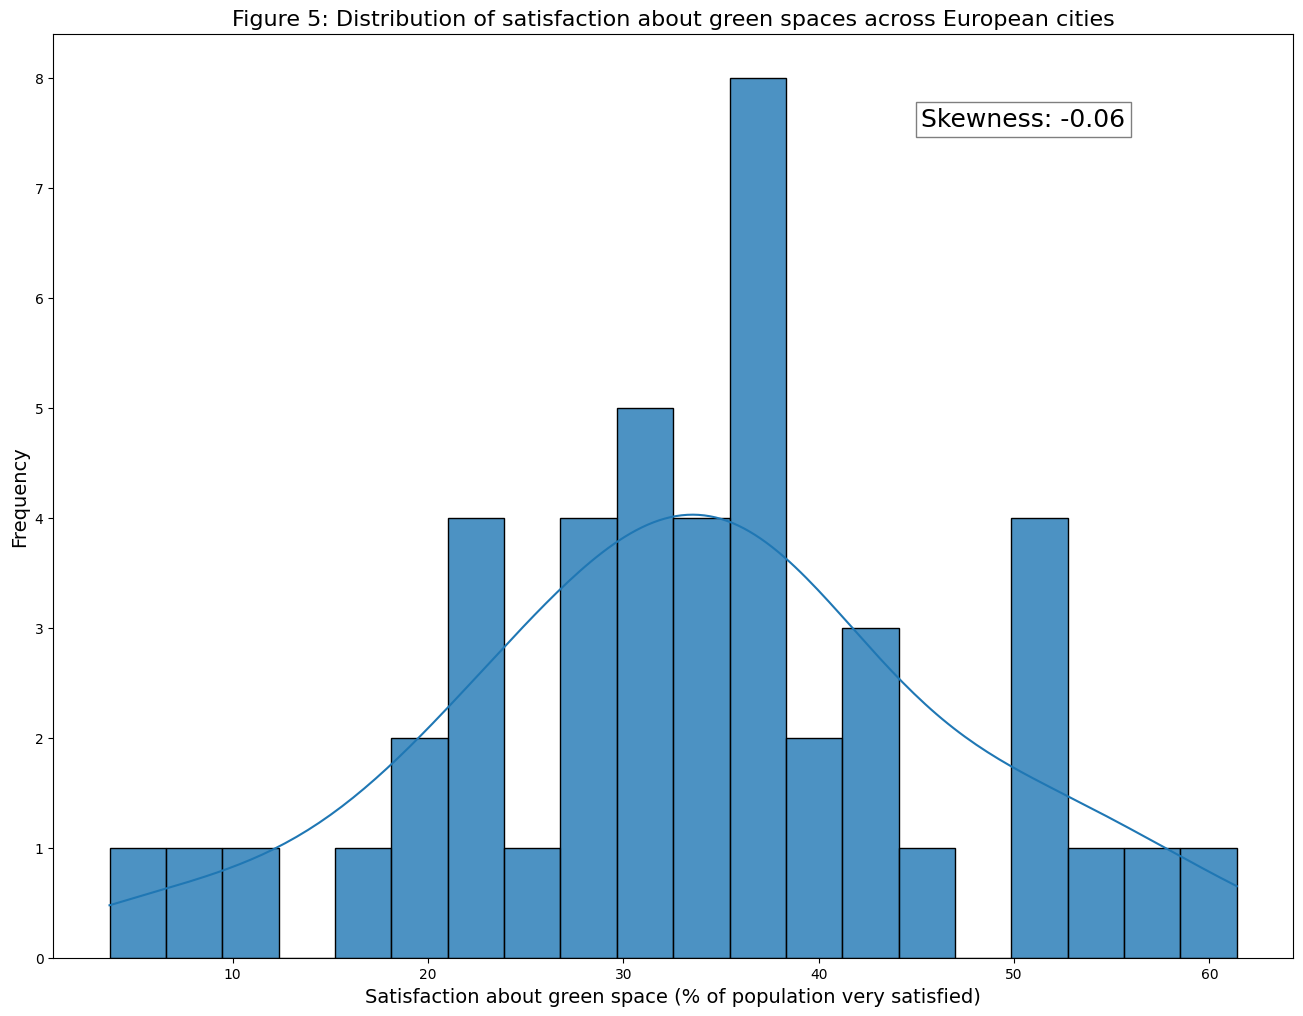

In [54]:
# EDA for satisfaction with green spaces
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the histogram with density curve
sns.histplot(restricted_sample['2019_satisfaction'], kde=True, bins=20,  ax=ax, alpha=0.8)  # Slight transparency for smoothness

# Add labels and title for histogram
ax.set_xlabel("Satisfaction about green space (% of population very satisfied)", fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Figure 5: Distribution of satisfaction about green spaces across European cities', fontsize=16)
skewness = restricted_sample['2019_satisfaction'].skew()

# Add text annotation for skewness on the histogram
ax.text(0.7, 0.9, f"Skewness: {skewness:.2f}", transform=ax.transAxes, fontsize=18, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

As shown in Figure 5, Our heterogeneous variable displays a symmetrical distribution around the mean, meaning that our dichotomous categorisation into high and low satisfaction induces large difference between observations that are close to the mean that were inexistent before categorisation.

Therefore, we try splitting the samples into groups that induce less heterogeneity than was previously existant in a next step. For this purpose, we split the samples one standard deviation away from the mean, into two uneven groups. To keep interpretation simple, we only keep two groups at once, but we do this twice (separately, once below and once above the mean). The results are shown in the following figure.

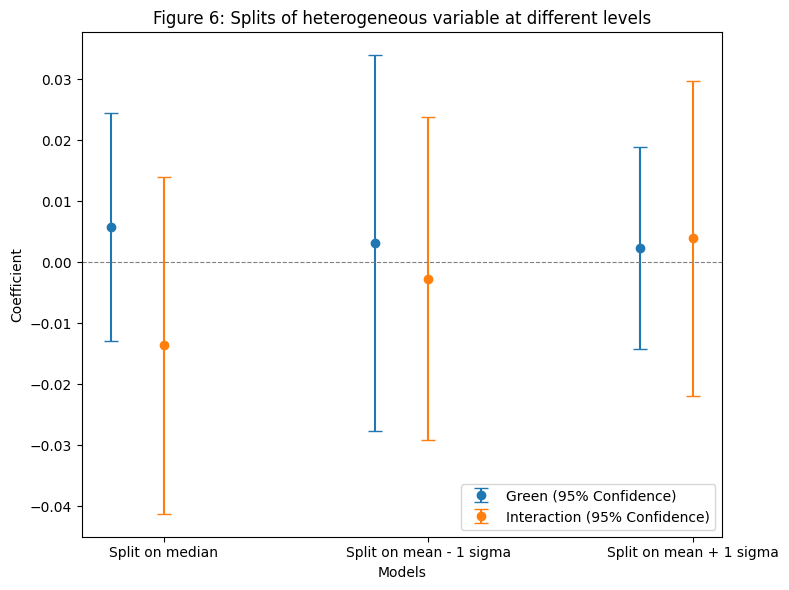

In [55]:
# Trying different splits for the restricted sample, using the interaction and the FE

# Median split already done in previous step

sigma = np.std(restricted_sample_dummies['2019_satisfaction'])
mean = np.mean(restricted_sample_dummies['2019_satisfaction'])

# Split at mean + 1 sigma
restricted_sample_dummies['dummy_satisfaction_onesigma'] = (restricted_sample['2019_satisfaction'] >= mean + sigma).astype(int)

# Split at mean - 1 sigma
restricted_sample_dummies['dummy_satisfaction_minusonesigma'] = (restricted_sample['2019_satisfaction'] >= mean - sigma).astype(int)

## Model for high split
Y_r_fe_i = restricted_sample_dummies['h_rate']

# Creating interaction term with the right dummy
restricted_sample_dummies['interaction'] = restricted_sample_dummies['green'] * restricted_sample_dummies['dummy_satisfaction_onesigma']

# Running the regression
X_r_fe_i = restricted_sample_dummies[['green', 'dummy_satisfaction_onesigma', 'interaction'] + controls + dummy_columns_r]
X_r_fe = sm.add_constant(X_r_fe_i)

high_split = sm.OLS(Y_r_fe_i, X_r_fe_i).fit(cov_type='cluster', cov_kwds={'groups': restricted_sample_dummies['country']})

## Model for low split

# Creating interaction term with the right dummy
restricted_sample_dummies['interaction'] = restricted_sample_dummies['green'] * restricted_sample_dummies['dummy_satisfaction_minusonesigma']

# Specifying the regression
Y_r_fe_i = restricted_sample_dummies['h_rate']
X_r_fe_i = restricted_sample_dummies[['green', 'dummy_satisfaction_minusonesigma', 'interaction'] + controls + dummy_columns_r]
X_r_fe = sm.add_constant(X_r_fe_i)

# Running the regression
low_split = sm.OLS(Y_r_fe_i, X_r_fe_i).fit(cov_type='cluster', cov_kwds={'groups': restricted_sample_dummies['country']})

# Plotting results using the function we built
plot_regression_coefficients([model_hetero_fe_int,low_split,high_split],
                             ['Split on median', 'Split on mean - 1 sigma', 'Split on mean + 1 sigma'],
                               ['green','interaction'],
                               'Figure 6: Splits of heterogeneous variable at different levels')


The leftmost coefficients correspond to the regression with the interaction term performed in the [heterogeneity section](#5-growing-separate-branches-heterogeneity). We find again the coefficients of 0.0058 for green space and -0.0136 for the interaction term. In both cases of the new splits, our results are not statistically significant, therefore we can only make preliminary observations and no statistical inference. Looking at the second pair of coefficients, we observe a combination of a positive coefficient and negative interaction term in the case for a split below the mean. Therefore, we could hypothesise that the difference in effect of green space on crime could be at play when satisfaction is particularly low. However, the third pair of coefficients would imply that green space has a positive effect on crime and that this is even more pronounced for areas with high satisfaction, contrary to all our expectations. Conclusion: branching out on this exploration was interesting, but not very informative.

# References

Burtka, A. (2023, June 20). One unexpected way to reduce violent crime? Create green spaces. National Geographic. https://www.nationalgeographic.com/environment/article/urban-greening-violent-crime-mental-health-nature

David, A. A. J., Boura, A., Lata, J., Rankovic, A., Kraepiel, Y., Charlot, C., Barot, S., Abbadie, L., & Ngao, J. (2017). Street trees in Paris are sensitive to spring and autumn precipitation and recent climate changes. Urban Ecosystems, 21(1), 133 145. https://doi.org/10.1007/s11252-017-0704-z

Dijkstra, L., H. Poelman & P. Veneri (2019), “The EU-OECD definition of a functional urban area”, OECD Regional Development Working Papers, No. 2019/11, OECD Publishing, Paris, https://doi.org/10.1787/d58cb34d-en

Glaeser, E. L., & Sacerdote, B. (1999). Why is There More Crime in Cities? Journal of Political Economy, 107(S6), S225–S258. https://doi.org/10.1086/250109

Jennings, V., Rigolon, A., Thompson, J., Murray, A., Henderson, A., & Gragg, R. S. (2024). The Dynamic Relationship between Social Cohesion and Urban Green Space in Diverse Communities : Opportunities and Challenges to Public Health. International Journal Of Environmental Research And Public Health, 21(6), 800. https://doi.org/10.3390/ijerph21060800

Kuo, F. E., & Sullivan, W. C. (2001). Environment and Crime in the Inner City. Environment And Behavior, 33(3), 343 367. https://doi.org/10.1177/0013916501333002

Machin, S., Marie, O., & Vujić, S. (2011). The Crime Reducing Effect of Education. The Economic Journal, 121(552), 463 484. https://doi.org/10.1111/j.1468-0297.2011.02430.x

Monteiro, M. V., Levanič, T., & Doick, K. J. (2017). Growth rates of common urban trees in five cities in Great Britain : A dendrochronological evaluation with an emphasis on the impact of climate. Urban Forestry & Urban Greening, 22, 11 23. https://doi.org/10.1016/j.ufug.2017.01.003

Patterson, E. B. (1991). Poverty, income inequality, and Community crime rates. Criminology, 29(4), 755 776. https://doi.org/10.1111/j.1745-9125.1991.tb01087.x

Pina-Sánchez, J., Brunton-Smith, I., Buil-Gil, D., & Cernat, A. (2023). Exploring the impact of measurement error in police recorded crime rates through sensitivity analysis. Crime Science, 12(1), 14. https://doi.org/10.1186/s40163-023-00192-5

Schertz, K. E., Saxon, J., Cardenas-Iniguez, C., Bettencourt, L. M. A., Ding, Y., Hoffmann, H., & Berman, M. G. (2021). Neighborhood street activity and greenspace usage uniquely contribute to predicting crime. Npj Urban Sustainability, 1(1). https://doi.org/10.1038/s42949-020-00005-7

Venter, Z. S., Shackleton, C. M., Van Staden, F., Selomane, O., & Masterson, V. A. (2020). Green Apartheid : Urban green infrastructure remains unequally distributed across income and race geographies in South Africa. Landscape And Urban Planning, 203, 103889. https://doi.org/10.1016/j.landurbplan.2020.103889

Weinstein, N., Balmford, A., DeHaan, C. R., Gladwell, V., Bradbury, R. B., & Amano, T. (2015). Seeing Community for the Trees : The Links among Contact with Natural Environments, Community Cohesion, and Crime. BioScience, 65(12), 1141 1153. https://doi.org/10.1093/biosci/biv151

Wu, C. Y. H., Lee, H. F., & Liu, H. (2019). Effect of temperature and precipitation change on crime in the metropolitan area in Virginia, USA. Asian Geographer, 37(1), 17 31. https://doi.org/10.1080/10225706.2019.1678046

